In [8]:
%load_ext autoreload
%autoreload 2
import pyvisa
import time
from PyTLPMX import TLPMX
import numpy as np
import numpy.matlib
import clr
from matplotlib import pyplot as plt
from datetime import datetime
from timeit import default_timer as timer
from scipy.optimize import curve_fit

clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.DeviceManagerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericPiezoCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericMotorCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PositionAlignerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PiezoCLI.dll")

# Import CLIs
from Thorlabs.MotionControl.DeviceManagerCLI import *
from Thorlabs.MotionControl.GenericMotorCLI import *
from Thorlabs.MotionControl.KCube.PositionAlignerCLI import *
from Thorlabs.MotionControl.KCube.PiezoCLI import *
from Thorlabs.MotionControl.GenericPiezoCLI.Piezo import *
from System import Decimal 
from pyximc import *
from module import *
from ConnectHardware import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Connect to Power Meter
meter = ConnectPM()

# Initialise settings
meter.setFreqMode(0)
meter.setWavelength(633.0)

# Turn on analog filter
meter.setInputFilterState(False)
time.sleep(1)

#Connect to rotation stage
motor_id = ConnectMotor()

#measNoise(meter, 20)

# Initialise parameters
start=43.5
end=46
step=0.2
mPeriod=500 # measurement time per angle in ms

# Run soft scan of angles 
print("\nRunning soft scan")
angles, power_vals, stdevs = PMAngleScan(meter, motor_id, start, end, step, mPeriod)

#minIdx = np.argmin(power_vals)
#print("\nSoft estimate of resonance angle: " + str(angles[minIdx]))



print("Disconnecting devices...")
meter.close()
lib.close_device(byref(c_int(motor_id)))
print('End program')

In [ ]:
fig = plotFittedData(angles, power_vals, stdevs)

In [30]:
# connect to lock-in amps
rm = pyvisa.ResourceManager()
amp1 = rm.open_resource('GPIB0::8::INSTR')
amp2 = rm.open_resource('GPIB0::9::INSTR')
print(rm.list_resources())

('ASRL3::INSTR', 'GPIB0::8::INSTR', 'GPIB0::9::INSTR')


In [29]:
motor_id = ConnectMotor()

Device with URI xi-com:\\.\COM3 successfully opened

Get device info
Result: 0

Get status
Result: 0


In [31]:
start=43.5
end=46
step=0.2
angles = np.arange(start, end+step, step)

TM_signal, TE_signal = AmpAngleScan(amp1, amp2, motor_id, angles)


Starting measurements

Moving to 43.5 degrees
Position: 43.5 degrees 

Taking power measurement

Moving to 43.7 degrees
Position: 43.70000076293945 degrees 

Taking power measurement

Moving to 43.900000000000006 degrees
Position: 43.900001525878906 degrees 

Taking power measurement

Moving to 44.10000000000001 degrees
Position: 44.09996032714844 degrees 

Taking power measurement

Moving to 44.30000000000001 degrees
Position: 44.29996109008789 degrees 

Taking power measurement

Moving to 44.500000000000014 degrees
Position: 44.5 degrees 

Taking power measurement

Moving to 44.70000000000002 degrees
Position: 44.70000076293945 degrees 

Taking power measurement

Moving to 44.90000000000002 degrees
Position: 44.900001525878906 degrees 

Taking power measurement

Moving to 45.10000000000002 degrees
Position: 45.09996032714844 degrees 

Taking power measurement

Moving to 45.300000000000026 degrees
Position: 45.29996109008789 degrees 

Taking power measurement

Moving to 45.5000000000

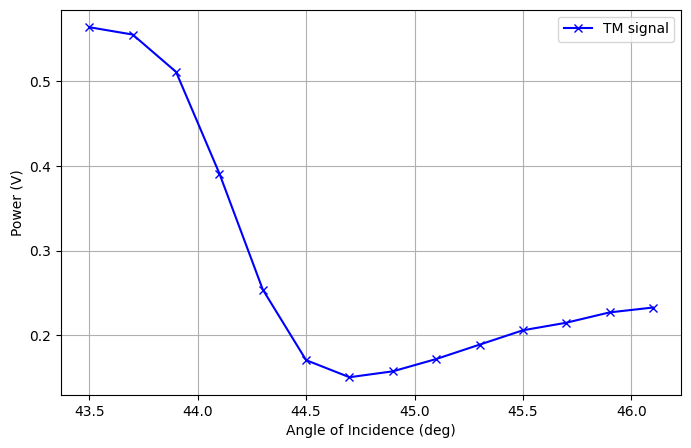

In [32]:
# PLOT RESULTS
fig, ax = plt.subplots(figsize=(8,5))

# calculate error and plot graph
ax.plot(angles, TM_signal, "bx-")
#ax.plot(angles, TE_signal, "rx-")

ax.set_xlabel('Angle of Incidence (deg)')
ax.set_ylabel('Power (V)')
ax.grid()
plt.legend(["TM signal"]) #, "TE signal"])
plt.show()

In [21]:
units = "degrees"
calib = calibration_t()
calib.A = c_double(0.01)   
calib.MicrostepMode = 9    
calib_move(lib, motor_id, 40, calib, units)
test_wait_for_stop(lib, motor_id, 100)


Moving to 40 degrees


In [33]:
print("Disconnecting devices...")
rm.close()
lib.close_device(byref(c_int(motor_id)))
print('End program')

Disconnecting devices...
End program


In [ ]:
18.75
12.05